Un reseau de neurone, c'est un reseau, de neurones. Comprenons alors comment fonctionne un neurone pour comprendre fonctione le reseau ensuite.

On peut arreter toute la theorie ici on disant le chose la plus importante de l'IA : le neurone n'est qu'une fonction lineaire.

Au debut de votre experience dans l'IA, lors de vos premiers modele de deep learning, beaucoup de vos questions seront repondus en vous remmeorrant que le neurone est fonction lineaire. garder toujours ca en tete.

Par contre le modele mathematique du neurone, lui, c'est different. On parle du neurone et du modele et c'est de la que vient la confusion. Donc Deuxieme chose la plus importante de l'IA : l'architecture d'un modele d'un neurone artificel est toujours la meme. toujours la meme.

Voici cette architecture :
1) un modele mathematique aui traite les donnes d'entrees
2) une fonction d'activation 
3) une mesure de performance
4) une optimisation de cette performance

C'est l'architecture commune a tout les neurones (et donc reseau de neurones). Ce qui change, c'est son contenu. Selon le modele mathematique du neurone (1), le modele mathematique de sa fonction d'activation (2), le modele mathematique de mesure de performance (3) et le modele mathematique de l'optimisation de cette performance (4) qui change.

Il faut donc comprendre comment fonctionne cette architecture avec un exmple pour comprendre le fonctionnement de n'importe quel neurone.

Alors prenons un exemple ;)

On va regarder comment fonctionne les maths derriere cette architecture un prenant un modele de classification binaire. N'ayez pas peur des termes, ils couleront de sens par la suite. CE qu'il faut comprendre, c'est que ce modele permet de separer lineairement deux classes.

imaginer que l'on ait deux types de plantes des plantes toxiques que l'on note y égal 1 et d'autres non toxique que l'on note y égal à zéro.

un jour on décide de mesurer certains attributs de ces plantes telles que la longueur et la largeur de leurs feuilles que l'on note x1 et x2 représentant les résultats dans un graphique on observe que les deux classes de plantes sont linéairement séparables

on peut donc développé un modèle capable de prédire à quelle classe appartient une future plantes en se basant sur cette droite

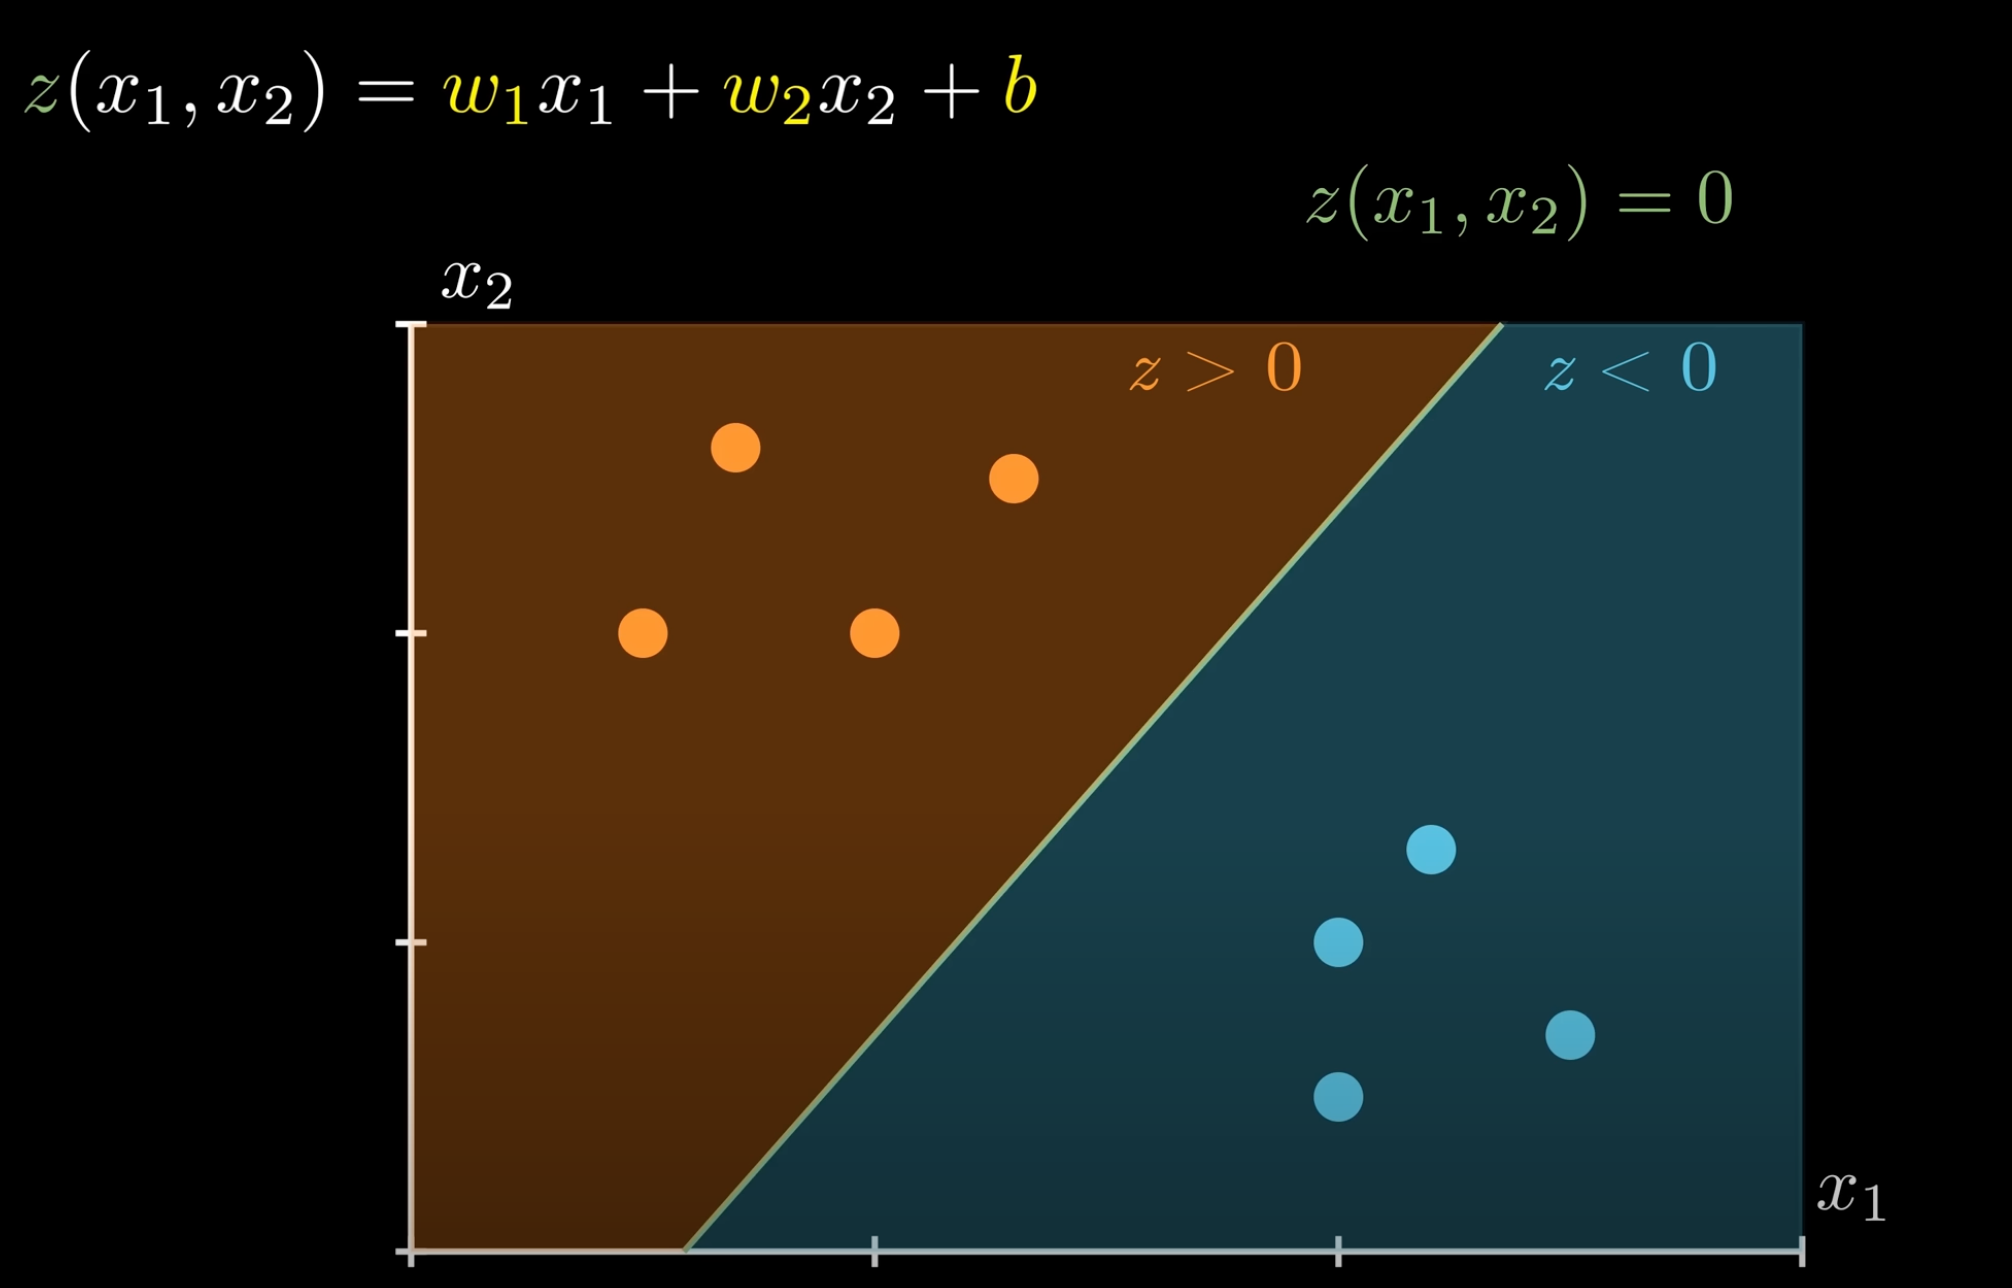

In [5]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/graph_1.png", width=600, height=400))

Pour trouver l'équation de cette droite on va développer ce qu'on appelle un modèle linéaire en fournissant aux variables x1 et x2 à un neurone et en multipliant au passage chaque entrée du neurone par un poids w dans ce neurones. on va également faire passer un coefficient complémentaires qu'on appelle le biais.

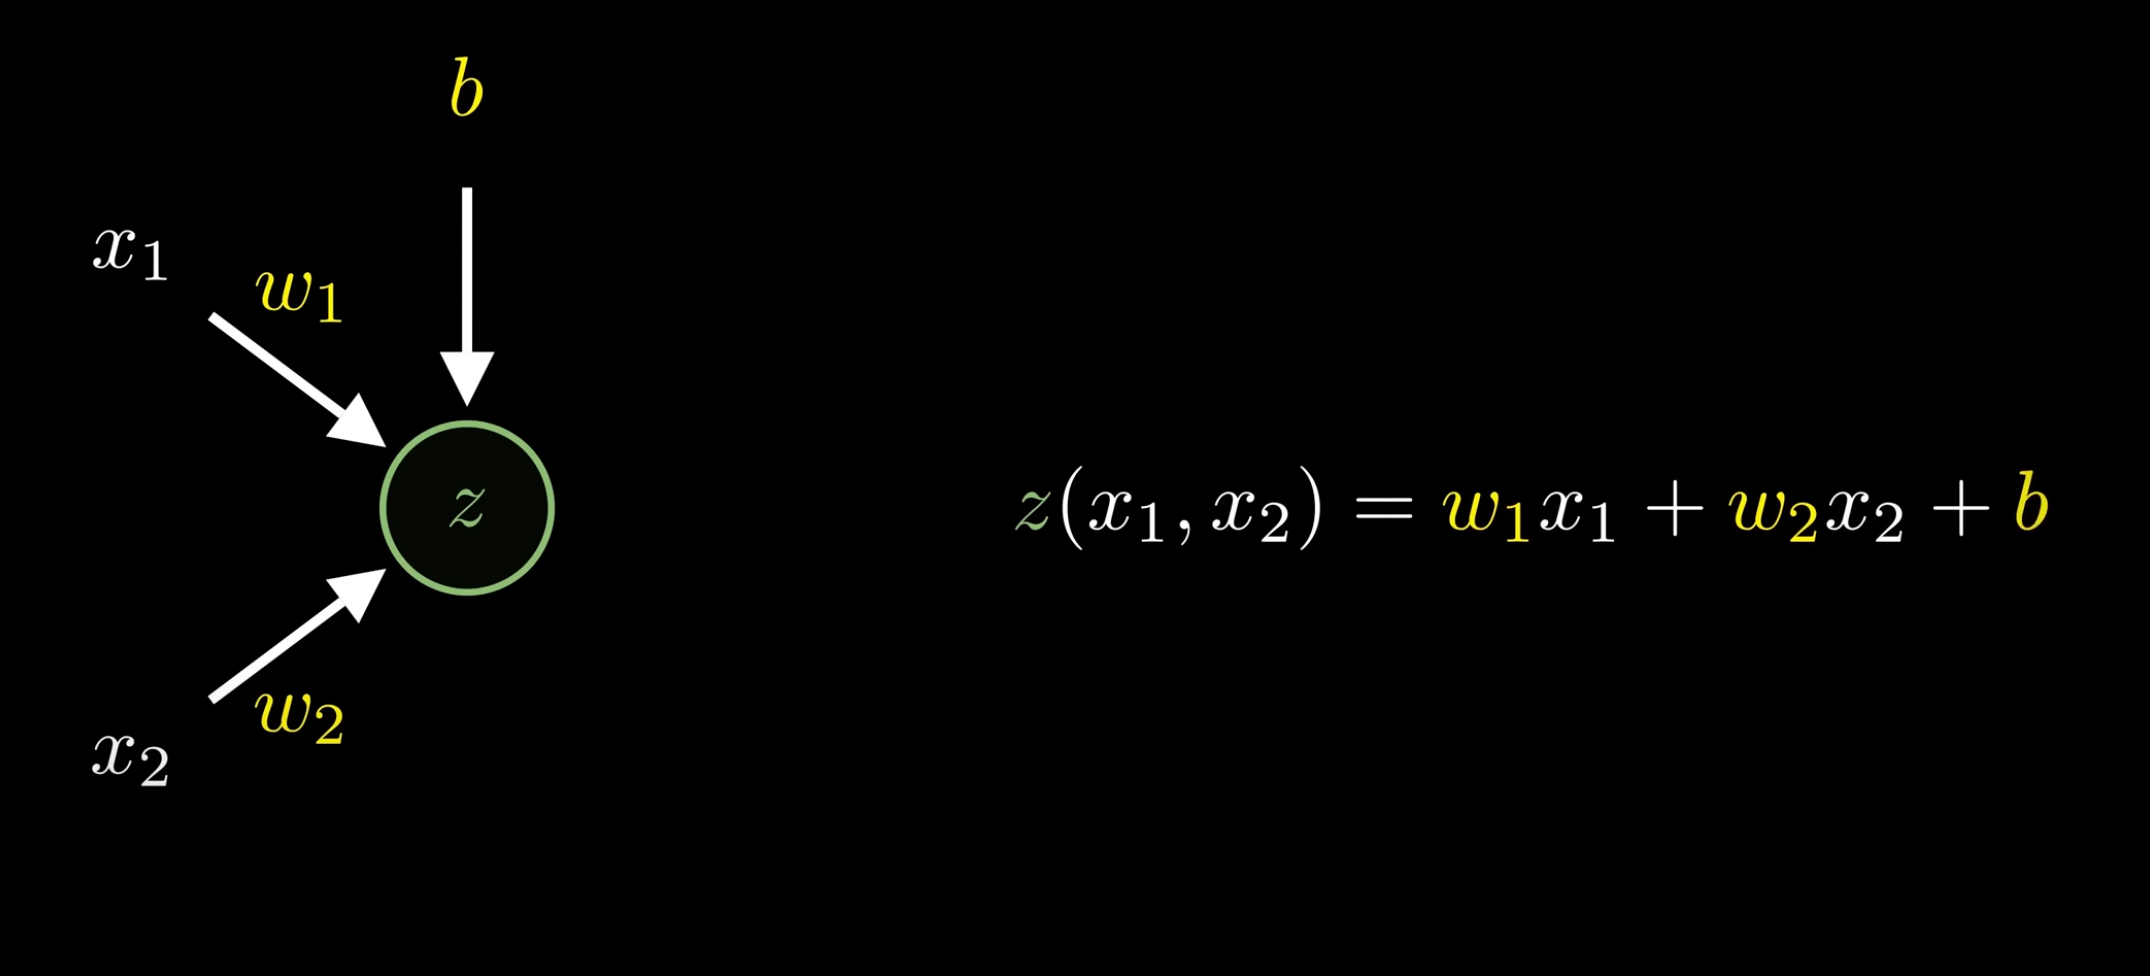

In [3]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/neurone.png", width=600, height=400))


pour prédire à quelle classe appartient une future plantes il va falloir régler les paramètres wb de façon à séparer du mieux possible nos deux classes après quoi on pourra dire si une plante et dans la classe 0 1

c'est ainsi que fonctionne le premier neurones de l'histoire du deep learning developpé par Rosenblatt en 1958

Maintenant il faut accompagner chaque prédiction d'une probabilité plus une plante sera éloignée de la frontière de décision plus il sera évident c'est à dire probable qu'elles appartiennent bien à sa classe

pour faire ça on utilise une fonction d'activation qui nous permet d'activer le neurone selon une regle, un critere, une methode definit par cette fonction d'activation. Par exemple, on peut utiliser la fonction sigmoïde qui va nous permettre de transformer la sortie du neurone en une probabilité entre 0 et 1.
On va donc appliquer cette fonction d'activation à la sortie du neurone pour obtenir une probabilité de 0 à 1. Si la probabilité est supérieure à 0,5, on classera la plante dans la classe 1, sinon on la classera dans la classe 0.

On a donc un modèle de classification binaire qui nous permet de prédire à quelle classe appartient une plante en se basant sur ses attributs. On peut également utiliser d'autres fonctions d'activation comme la fonction ReLU ou la fonction tanh, mais le principe reste le même : on applique une fonction d'activation à la sortie du neurone pour obtenir une probabilité.




on peut donc ecrire la fonction d'activation de la manière suivante :
$$
a(z) = \frac{1}{1 + e^{-z}}
$$
où z est la sortie du neurone et e la fonction exponontielle.

Voici le graphe de la fonction sigmoïde.

Prenons un exemple concret pour illustrer tout ça. Imaginons que l'on ait une plante qui se situe dans la zone orange du graphique ci-dessus. La sortie du neurone sera positive. imagine que sa sortie vaut z = 1,5. En appliquant la fonction sigmoïde, on obtient, la plante se situe ici sur la graphique de la fonction sigmoide :

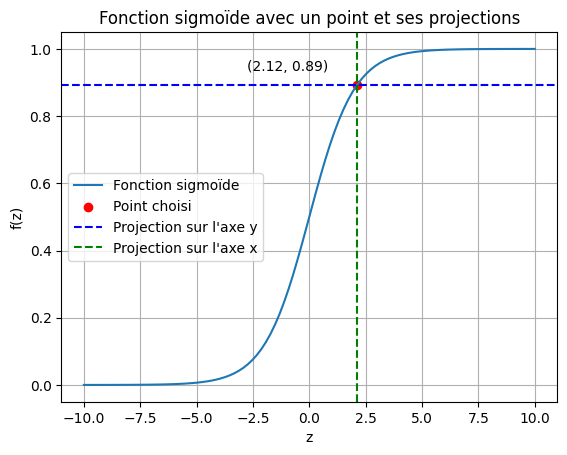

In [10]:
import numpy as np
import matplotlib.pyplot as plt
z = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-z))

# Choisir un point spécifique sur la courbe
point_index = 60  # Par exemple, le 50ème point
x_point = z[point_index]
y_point = y[point_index]

# Tracer la courbe sigmoïde
plt.plot(z, y, label='Fonction sigmoïde')

# Ajouter le point choisi
plt.scatter([x_point], [y_point], color='red', label='Point choisi')

# Tracer les projections sur les axes
plt.axhline(y=y_point, color='blue', linestyle='--', label='Projection sur l\'axe y')
plt.axvline(x=x_point, color='green', linestyle='--', label='Projection sur l\'axe x')

# Ajouter des annotations
plt.annotate(f'({x_point:.2f}, {y_point:.2f})', (x_point, y_point), textcoords="offset points", xytext=(-50,10), ha='center')

# Ajouter des détails au graphique
plt.title('Fonction sigmoïde avec un point et ses projections')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.legend()
plt.grid()
plt.show()

Le point choisi represente la plante dont la valeur de sortie z donne donne une probabilité en sortie de la fonction d'activation égale à 0,89 ce qui signifie que d'après notre modèle cette plante à 89% de chance d'appartenir à la classe 1. c'est une probabilité relativement élevé ce qui est logique vu que cette plante se situe dans la zone orange, là où nous sommes censés obtenir des plantes toxiques.

Donc cette meme plante a une probabilite opposee de 11% d'appartenir à la classe 0. (ie la probabilite complémentaire).

Toutes ces plantes suivent ce meme principe, donc toutes les probablites suivent la meme loi de probabilite.

La probabilite d'appartenir à la classe oppose est la probabilite complementaire. Ces probabilites suivejt alors toutes une loi de Bernoulli de parametre (a(z)) avec a la fonction d'activation et z la sortie du neurone pour cette plante.


reecrivaon en terme mathematiques :
La probablite pour la plante x d'appartenir à la classe y est donnée par la fonction d'activation a(z) et la probabilité d'appartenir à la classe oppose est donnée par la probabilité complémentaire 1 - a(z). On peut donc écrire :
$$
P(Y = y = 1) = a(z)
$$
$$
P(Y = y = 0) = 1 - a(z)
$$

Ainsi chaque probabilité suit la loi de Bernoulli de parametre a(z) :


$$
P(Y = y) = a(z)^y \cdot (1 - a(z))^{1-y}
$$

En effet, si la plante appartient à la classe 1, alors y = 1 et la probabilité est égale à a(z). Si la plante appartient à la classe 0, alors y = 0 et la probabilité est égale à 1 - a(z).

Maintenant que l'on a un modèle de classification binaire pour traiter les donnees d'entrees, il faut évaluer la performance de ce modèle. 

Comment l'evaluer ?

régler les paramètres (W, b) de façon à obtenir le meilleur modèle possible c'est à dire le modèle qui fait les plus petites erreurs entre les sorties a(z) et les vraies données y.

Pour cela, on va utiliser une mesure de performance qui va nous permettre de quantifier l'erreur entre les prédictions du modèle et les vraies données.

Une des façons d'évaluer la performance de notre modèle c'est de calculer sa vraisemblance. La vraisemblance ça nous indique la plausibilité de notre modèle vis-à-vis de données que l'on considère comme vrai.


Ici, par exemple si une plante est toxique et que le modèle nous retourne une probabilité toxiques égal à 89% alors il est lui même vraisemblable à 89%.

Pour calculer la vraisemblance de notre modèle on va tout simplement faire le produit de chaque probabilités associee à chaque plante.

Comme ces probablites suivent une loi de bernoulli, On peut donc écrire la vraisemblance de notre modèle comme suit :
$$
L(W, b) = \prod_{i=1}^{N} P(Y = y_i) = \prod_{i=1}^{N} a(z_i)^{y_i} \cdot (1 - a(z_i))^{1-y_i}
$$
où N est le nombre de plantes, y_i est la classe de la plante i et x_i est les attributs de la plante i.

Mais on a un problème, c'est que la vraisemblance est un produit de probabilités comprises entre 0 et 1. Si on a beaucoup de plantes, ce produit va être très petit et donc difficile à manipuler. P
$$
\lim_{N \to \infty} L(W, b) = 0
$$

Pour éviter ça, on va prendre le logarithme de la vraisemblance. En effet, le logarithme d'un produit est égal à la somme des logarithmes :
$$
\log L(W, b) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$
Cette fonction de vraisemblance est appelée la fonction de coût. Elle nous permet de quantifier l'erreur entre les prédictions du modèle et les vraies données. Plus la vraisemblance est élevée, plus le modèle est performant.
Il faut donc maximiser cette vraisemblance pour obtenir le meilleur modèle possible. 
Mais en data science, on ne cherche jamais à maximiser, on cherhce à minimiser, donc on prend l'oppose.
On rajoute donc un signe moins, et un facteur 1/N devqnt qui permet de normaliser la fonction de coût pour qu'elle soit comprise entre 0 et 1, rien de plus.

On va donc poser la fonction Log-loss qui se définit comme suit :
$$
\text{Log-loss} = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$

Voici notre fonction de coût. Elle nous permet de quantifier l'erreur entre les prédictions du modèle et les vraies données. Plus la log-loss est faible, plus le modèle est performant.

maintenant qu'on dispose notre fonction coup on va pouvoir s'en servir pour minimiser les erreurs de notre modèle et pour ça on va utiliser l'algorithme de la descente de gradient

la descente de gradient l un des algorithmes d'apprentissage les plus utilisés en machine learning et andy planning il consiste à ajuster les paramètres wbb de façon à minimiser les erreurs du modèle c'est à dire à minimiser la fonction cout.

Pour ca il faut voir comment la fonction de coût varie en fonction des paramètres w et b. Est-ce que la fonction de coût augmente ou diminue quand on augmente ou diminue les paramètres w et b ? pour répondre à cette question on doit calculer ce qu'on appelle un gradient (ou une dérivee).

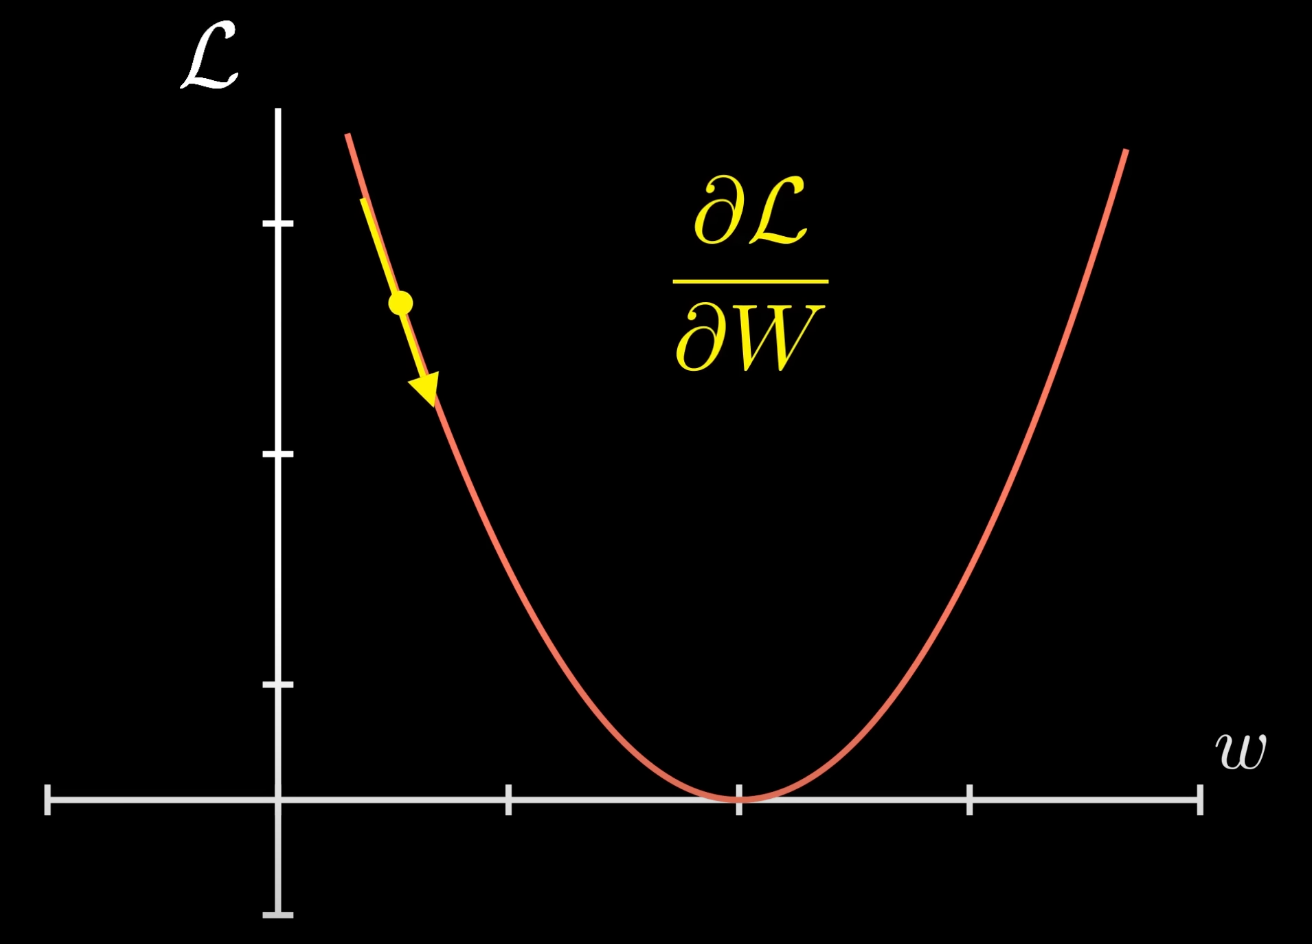

In [13]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/gradient.png", width=400, height=300))

la dérive et d'une fonction ça nous indique comment est-ce que cette fonction varie. Si quand w augmente le derivee est negative, ça veut dire que la fonction diminue et qu'il falloir augmenter w si on veur minimiser la fonction coût. a l'inverse si la dérivée est positive, ça veut dire que la fonction augmente et qu'il faut diminuer w pour minimiser la fonction coût.

On va alors calculer la dérivée de la fonction coût par rapport à w et b.
$$
\nabla L(W, b) = \left( \frac{\partial L}{\partial W}, \frac{\partial L}{\partial b} \right)
$$
où L est la fonction de coût, W est le vecteur des poids et b est le biais.
On va ensuite mettre à jour les paramètres w et b en fonction du gradient :
$$
W = W - \alpha \cdot \frac{\partial L}{\partial W}
$$
$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$
où α est le taux d'apprentissage.

On voit bien ici que la mise à jour des paramètres w et b dépend de la dérivée de la fonction coût par rapport à w et b. relisez la phrase d'explications plus haut si besoin.

Ola ola... attendez.. Ca y est on a fini l'architecture du neurone !

On vientt de voir : 
1) un modele mathematique qui traite les donnes d'entrees : le modele lineaire de classification binaire
2) une fonction d'activation : la fonction sigmoide
3) une mesure de performance (ou fonction de coût) : la log-loss
4) une optimisation de cette performance : la descente de gradient

MAIS vous n'avez pas encore compris comment fonctionne cette architecture. Mais ne vous inquietez pas, c'est normal. On va le voir ensemble.

Pour comprendre comment fonctionne cette architecture, il faut implementer toutes ces fonctions dans une boucle d'apprentissage qui sera alors d'apprendre : exactement ce que fait un neurone.

POur ca il va nous falloir connaître l'expression de ces fameux gradient ceux qui interviennent dans la descente de gradient. C'est des maths, c'est pas drole, mais c'est important. On va donc les calculer ensemble, pas à pas.

Pour cela, on va partir de la fonction de coût et on va calculer les gradients par rapport à w et b. On va donc dériver la fonction de coût par rapport à w et b.

Plus precisement, il faut au'on calclule ces 3 gradients :
1) le gradient de la fonction de coût par rapport à w1
2) le gradient de la fonction de coût par rapport à w2
3) le gradient de la fonction de coût par rapport à b

En terme mathematiques, on va donc calculer les gradients suivants :
$$
\frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \frac{\partial L}{\partial b}
$$


POur cela, on va utiliser la regle de la chaine. La regle de la chaine, c'est une regle de derivation qui nous permet de calculer la derivee d'une fonction composee. En gros, si on a une fonction f(g(x)), on peut calculer la derivee de f par rapport à x en multipliant la derivee de f par rapport à g par la derivee de g par rapport à x.
On va donc appliquer la regle de la chaine à notre fonction de coût. On va donc calculer les gradients suivants :
$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$
$$
\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_2}
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial b}
$$

On y va pour le premier. On veut obtenir ce calcul :
$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$

En reprenant les expresisons de chaque fonctions, voici les formules de chaque gradient:

$$
\frac{\partial L}{\partial a} = \frac{-1}{N} \sum_{i=1}^{N} \left( y_i \cdot \frac{1}{a(z_i)} - (1 - y_i) \cdot \frac{1}{1 - a(z_i)} \right)
$$
$$
\frac{\partial a}{\partial z} = a(z) \cdot (1 - a(z))
$$
$$
\frac{\partial z}{\partial w_1} = x_1
$$


On peut alors commencer le developpement :

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \omega_1} & =\frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1} \\
& =\left(-\frac{1}{m} \sum_i y_i \frac{1}{a_i}+\left(1-y_i\right) \times-\frac{1}{1-a_i}\right) \times e^{-z}\left(1+e^{-z}\right)^{-2} \times x_1 \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i}{a_i}+\frac{\left(y_i-1\right)}{1-a_i}\right) \frac{e^{-z}}{\left(1+e^{-z}\right)^2} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i-y_i a_i+a_i y_i-a_i}{a_i\left(1-a_i\right)}\right) a(z) \frac{\left(e^{-z}+1\right)-1}{1+e^{-z}} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)}\right) a(z) \times(1-a(z)) \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)} \times a_{i j}\left(1-a_i\right)\right) \\
& =-\frac{x_1}{m} \sum_i^m\left(y_i-a_i\right) \\
\end{aligned}
$$
Ainsi, on obtient le gradient de la fonction de coût par rapport à w1 :
$$
\left[\frac{\partial \mathcal{L}}{\partial w_1}=-\frac{x_1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$
De la meme maniere, on peut calculer le gradient de la fonction de coût par rapport à w2 :
$$
\left[\frac{\partial \mathcal{L}}{\partial w_2}=-\frac{x_2}{m} \sum_i\left(y_i-a_{i}\right)\right]

$$



Pour le gradient de la fonction de coût par rapport à b, il suffit de voir que :

$$
\frac{\partial z}{\partial b} = 1
$$

En rereprenant la meme demarche que pour les autres gradients, on obtient tout de suite :
$$
\left[\frac{\partial \mathcal{L}}{\partial b}=-\frac{1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$

Et voila, on a tous les gradients de la fonction de coût par rapport à w et b. On peut donc les utiliser pour mettre à jour les paramètres w et b dans la boucle d'apprentissage.
On va donc mettre à jour les paramètres w et b en fonction des gradients :
$$
W = W - \alpha \cdot \frac{\partial L}{\partial W}
$$
$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$


Ca y est !! bon c'etait vraiment la partie la plus dure a comprendre.

Desormais il ne reste plus qu'à coder tout ça dans une boucle d'apprentissage, c'est beaucoup plus simple vous allez voir.


Rendez-vous sur le notebook practice_00 pour coder un neurone capable de classifier des plantes toxiques et non toxiques !